In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
from collections import Counter
import emoji
import nltk
from num2words import num2words
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#nltk.download('wordnet')
#nltk.download('stopwords')

df = pd.read_csv("path/to/file/data_hate_no_hate.csv", encoding="UTF-16")



In [2]:
df["num-chars"] = df.apply(lambda row: len(row["tweet"]),axis=1)
df["num-words"] = df.apply(lambda row: len(list(filter(lambda x: x==" ", row["tweet"]))), axis=1)
df["avg-chars-per-word"] = df.apply(lambda row: int(row["num-chars"]/row["num-words"]), axis=1)

fig, axes = plt.subplots(1, 3, figsize=(5, 4), sharex=False)

# Create individual boxplots
sns.boxplot(y=df["num-chars"], ax=axes[0], color="skyblue")
axes[0].set_title("Num chars")
axes[0].set_ylabel("")

sns.boxplot(y=df["num-words"], ax=axes[1], color="salmon")
axes[1].set_title("Num words")
axes[1].set_ylabel("")

sns.boxplot(y=df["num-words"], ax=axes[2], color="lightgreen")
axes[2].set_title("Score")
axes[2].set_ylabel("")

# Adjust layout for a compact view
plt.tight_layout()
plt.show()

'fig, axes = plt.subplots(1, 3, figsize=(5, 4), sharex=False)\n\n# Create individual boxplots\nsns.boxplot(y=df["num-chars"], ax=axes[0], color="skyblue")\naxes[0].set_title("Num chars")\naxes[0].set_ylabel("")\n\nsns.boxplot(y=df["num-words"], ax=axes[1], color="salmon")\naxes[1].set_title("Num words")\naxes[1].set_ylabel("")\n\nsns.boxplot(y=df["num-words"], ax=axes[2], color="lightgreen")\naxes[2].set_title("Score")\naxes[2].set_ylabel("")\n\n# Adjust layout for a compact view\nplt.tight_layout()\nplt.show()'

# Calculate score and class based of the labels

In [3]:
def calc_score(l):
    counter = 0
    for i in l:
        if i == 'Y':
            counter += 1
            
    return counter

df["score"] = df.apply(lambda row: calc_score(row["labels"]), axis=1)
df["class"] = df.apply(lambda row: row["score"] >= 3, axis=1)



# Balance of the data

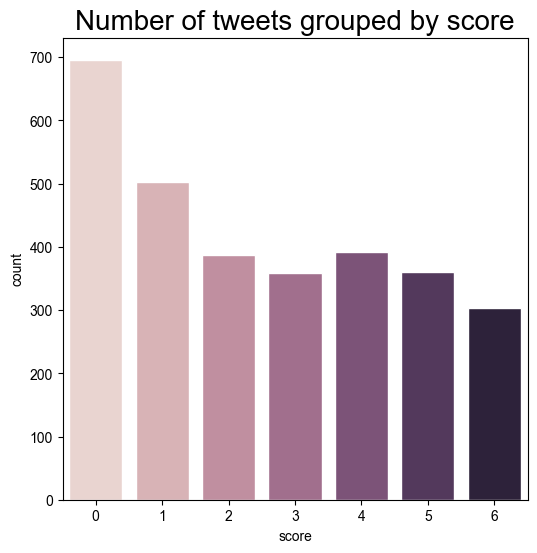

In [4]:
# plt.figure(figsize=(6, 6), dpi=200)
plt.figure(figsize=(6, 6))
plt.title("Number of tweets grouped by score", fontsize=20)
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="score", hue="score", data=df)
# bx = sns.countplot(x="class", data=df)
ax.get_legend().remove()

In [5]:

sizes = df["score"].value_counts()
print(sizes)
# Beispiel-Daten für 7 Werte
labels = ['0', '1', '2', '3', '4', '5', '6']  # Bezeichnungen der Segmente
colors = ['#c9e4ca', '#a8d0b6', '#87bba2', '#487178', '#3b6064', '#39555e', '#364958']  # Farben der Segmente
# https://coolors.co/c9e4ca-a8d0b6-87bba2-55828b-3b6064-39555e-364958

# Donut-Chart erstellen
plt.figure(figsize=(6, 6))
plt.title("Number of annotators that classifed tweet as sexist", fontsize=20)
plt.pie(sizes, 
        labels=labels, 
        colors=colors, 
        wedgeprops={'width': 0.3}, 
        startangle=90,  # Startet das erste Segment bei 90 Grad (oben)
        counterclock=False,  # Zeigt die Segmente im Uhrzeigersinn an
        #autopct=lambda p: int((p/100)*sum(sizes)))
        autopct=lambda p: "",
        textprops={"fontsize":18})

# Anzeigen
plt.show()

score
0    696
1    503
4    392
2    387
5    360
3    358
6    303
Name: count, dtype: int64


'plt.figure(figsize=(6, 6))\nplt.title("Number of annotators that classifed tweet as sexist", fontsize=20)\nplt.pie(sizes, \n        labels=labels, \n        colors=colors, \n        wedgeprops={\'width\': 0.3}, \n        startangle=90,  # Startet das erste Segment bei 90 Grad (oben)\n        counterclock=False,  # Zeigt die Segmente im Uhrzeigersinn an\n        #autopct=lambda p: int((p/100)*sum(sizes)))\n        autopct=lambda p: "",\n        textprops={"fontsize":18})\n\n# Anzeigen\nplt.show()'

In [6]:

sizes = df["class"].value_counts()
print(sizes)
labels = ['not sexist', 'sexist'] 
colors = ['#a8d0b6', '#364958'] 

# plt.figure(figsize=(6, 6), dpi=200)

plt.figure(figsize=(6, 6))
plt.title("Balance of tweets", fontsize=20)
plt.pie(sizes, 
        labels=labels, 
        colors=colors, 
        wedgeprops={'width': 0.3}, 
        startangle=90,  
        counterclock=False,  
        #autopct=lambda p: int((p/100)*sum(sizes)))
        autopct=lambda p: str(int(p)) + "%",
        pctdistance=0.5,
        textprops={"fontsize":16})

# Anzeigen
plt.show()

class
False    1586
True     1413
Name: count, dtype: int64


'\nplt.figure(figsize=(6, 6))\nplt.title("Balance of tweets", fontsize=20)\nplt.pie(sizes, \n        labels=labels, \n        colors=colors, \n        wedgeprops={\'width\': 0.3}, \n        startangle=90,  \n        counterclock=False,  \n        #autopct=lambda p: int((p/100)*sum(sizes)))\n        autopct=lambda p: str(int(p)) + "%",\n        pctdistance=0.5,\n        textprops={"fontsize":16})\n\n# Anzeigen\nplt.show()'

# Wordcloud before

In [7]:
text = " ".join(df["tweet"])
wordcloud_old = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(16, 9))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_old, interpolation='bilinear')
plt.title("Word Cloud for all tweets before preprocessing")
plt.axis('off')
plt.show()

'\nplt.figure(figsize=(16, 9))\nplt.subplot(1, 2, 1)\nplt.imshow(wordcloud_old, interpolation=\'bilinear\')\nplt.title("Word Cloud for all tweets before preprocessing")\nplt.axis(\'off\')\nplt.show()'

In [8]:
text = " ".join(df[df['class'] == True]['tweet'])
wordcloud_old = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(16, 9))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_old, interpolation='bilinear')
plt.title("Word Cloud for all tweets before preprocessing")
plt.axis('off')
plt.show()

'\nplt.figure(figsize=(16, 9))\nplt.subplot(1, 2, 1)\nplt.imshow(wordcloud_old, interpolation=\'bilinear\')\nplt.title("Word Cloud for all tweets before preprocessing")\nplt.axis(\'off\')\nplt.show()'

# Preprocess the data

In [9]:
regex_link = r"http(s?)://(([a-z]|[A-Z]|\d)+\.)+([a-z]|[A-Z]|\d)+/?(([a-z]|[A-Z]|\d)+/?)*"
regex_email = r"([a-z]|[A-Z]|\d)+\.([a-z]|[A-Z]|\d)+\@([a-z]|[A-Z]|\d)+\.([a-z]|[A-Z]|\d)+"
regex_tag = r"@([a-z]|[A-Z]|_|\d)+"

# def convert_number(text):
    

def remove_unwanted(row):
    cleaned_text = row["tweet"].lower()
    cleaned_text = re.sub(regex_link, "", cleaned_text)
    cleaned_text = re.sub(regex_email, "", cleaned_text)
    cleaned_text = re.sub(regex_tag, "", cleaned_text)
    cleaned_text = re.sub(r",", " ", cleaned_text)
    cleaned_text = re.sub(r":", " ", cleaned_text)
    cleaned_text = re.sub(r"\.", " ", cleaned_text)
    cleaned_text = re.sub(r"(ain\'t)|(ain\’t)", " is not", cleaned_text)
    cleaned_text = re.sub(r"(can\'t)|(can\’t)|(cant)", " can not", cleaned_text)
    cleaned_text = re.sub(r"(n\'t)|(n\’t)", " not", cleaned_text)
    cleaned_text = re.sub(r"(\'s)|(\’s)", " is", cleaned_text)
    cleaned_text = re.sub(r"(\'d)|(\’d)", " would", cleaned_text)
    cleaned_text = re.sub(r"(\'m)|(\’m)", " am", cleaned_text)
    cleaned_text = re.sub(r"(\'re)|(\’re)", " are", cleaned_text)
    cleaned_text = re.sub(r"(\'ve)|(\’ve)", " have", cleaned_text)
    cleaned_text = re.sub(r"(\'ll)|(\’ll)", " will", cleaned_text)
    cleaned_text = re.sub(r"&amp;", " and ", cleaned_text)
    cleaned_text = re.sub(r"&gt;", " greater than ", cleaned_text)
    cleaned_text = re.sub(r"&lt;", " less than ", cleaned_text)
    cleaned_text = re.sub(r"\su\s", " you ", cleaned_text)
    cleaned_text = re.sub(r"\'|\||\’|\‘", "", cleaned_text)
    cleaned_text = re.sub(r"\s\s+", " ", cleaned_text)
    cleaned_text = re.sub(r"\"", "", cleaned_text)
    
    # turn emojis to text
    cleaned_text = emoji.demojize(cleaned_text)
    # turn numbers to text
    cleaned_text = re.sub(r"\d\d\d\d", "", cleaned_text)
    cleaned_text = re.sub(r"\d+", lambda x: num2words(x.group()), cleaned_text)
    
    # only allow english characters and certian punctiation
    cleaned_text = re.sub(r"[^a-z|\!|\#|\_|\?|\s|\-]", "", cleaned_text)
    return cleaned_text

df["clean"] = df.apply(lambda row: remove_unwanted(row), axis=1)

df["clean"].to_csv('out.csv', index=False)

# Wordcloud after

In [10]:
text = " ".join(df[df['class'] == False]['clean'])
wordcloud_old = WordCloud(width=1400, height=800, background_color='white').generate(text)

plt.figure(figsize=(16, 9), dpi=100)
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_old, interpolation='bilinear')
plt.title("Word Cloud for all tweets after preprocessing", fontsize=20)
plt.axis('off')
plt.show()

'\nplt.figure(figsize=(16, 9), dpi=100)\nplt.subplot(1, 2, 1)\nplt.imshow(wordcloud_old, interpolation=\'bilinear\')\nplt.title("Word Cloud for all tweets after preprocessing", fontsize=20)\nplt.axis(\'off\')\nplt.show()'

In [11]:
# Step 1: Separate text based on class
true_text = " ".join(df[df['class'] == True]['clean'])
false_text = " ".join(df[df['class'] == False]['clean'])

# Step 2: Get word frequencies for each class
true_counter = Counter(true_text.split())
false_counter = Counter(false_text.split())

# Step 3: Calculate the difference in word frequencies
difference_counter_true = Counter({word: true_counter[word] - false_counter[word] for word in true_counter.keys() | false_counter.keys()})
difference_counter_false = Counter({word: false_counter[word] - true_counter[word] for word in true_counter.keys() | false_counter.keys()})

# Step 4: Create a word cloud based on the difference in frequencies
wordcloud_true = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(difference_counter_true)
wordcloud_false = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(difference_counter_false)

# Display the word cloud
print("sexist minus not sexist")
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_true, interpolation="bilinear")
plt.title("Occurance of words in sexist tweets with \nthe occurance of those words in non sexist tweets removed", fontsize=20)
plt.axis("off")
plt.show()

print("not sexist minus sexist")
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_false, interpolation="bilinear")
plt.title("Occurance of words in non sexist tweets with \nthe occurance of those words in sexist tweets removed", fontsize=20)
plt.axis("off")
plt.show()

'\n# Display the word cloud\nprint("sexist minus not sexist")\nplt.figure(figsize=(10, 5))\nplt.imshow(wordcloud_true, interpolation="bilinear")\nplt.title("Occurance of words in sexist tweets with \nthe occurance of those words in non sexist tweets removed", fontsize=20)\nplt.axis("off")\nplt.show()\n\nprint("not sexist minus sexist")\nplt.figure(figsize=(10, 5))\nplt.imshow(wordcloud_false, interpolation="bilinear")\nplt.title("Occurance of words in non sexist tweets with \nthe occurance of those words in sexist tweets removed", fontsize=20)\nplt.axis("off")\nplt.show()'

# Remove stop words

### Identify the stop words

In [12]:
# all_tweets = []
# for text in df['clean']:
#     all_tweets += text.lower().split(" ")


# word_counts = Counter(all_tweets)
# most_common_words = word_counts.most_common(30)
# words, counts = zip(*most_common_words)

# for word in words:
#     if word == "\n":
#         print("t")

# # Plotting
# plt.figure(figsize=(12, 10))
# plt.barh(words, counts, color='#003d86')
# plt.xlabel('Frequency')
# plt.title('Top 30 Most Common Unigrams')
# plt.gca().invert_yaxis()  # Invert y-axis to show the highest count on top
# plt.show()

# Stop words that will be deleteted
1. the
2. to
3. is
4. a
5. and
6. i
7. of
8. you
9. it
10. that
11. in
12. are
13. on
14. be
15. with
16. as
17. so
18. was
19. at
20. am
21. about
22. their
23. by
24. will
25. can
26. get
27. from
28. up
29. an
30. out
31. ca
32. do
33. does
34. did
35. have
- 
my
me
your
he
we
her
she
no
his


we keep the "not" because it contains an important meaning. That is also the Reason for splitting "doesn't" to "does not"
(for)

In [13]:
# def remove_stopwords(row):
#     cleaned_text = re.sub(r"\b(the|to|is|a|and|i|of|you|it|that|in|are|on|be|with|as|so|was|at|am|about|their|by|will|can|get|from|up|an|out|ca|do|does|did|have)\b", " ", row["clean"])
#     cleaned_text = re.sub(r"\s\s+", " ", cleaned_text)
#     return cleaned_text

# df["no stopwords"] = df.apply(remove_stopwords, axis=1)

# Remove stop words
keep
- but
- nor
- not
- against

In [14]:
lemmatizer = WordNetLemmatizer() 
STOPWORDS = set(stopwords.words('english')) - {"but", "nor", "not", "against"}
print(STOPWORDS)

def remove_stopwords(text):
    # clean = [lemmatizer.lemmatize(word) for word in text["clean"] if not word in STOPWORDS]
    tweet = text["clean"].split()
    clean = [lemmatizer.lemmatize(word) for word in tweet if not word in STOPWORDS]
    return " ".join(clean)


df["no stopwords"] = df.apply(remove_stopwords, axis=1)

df["no stopwords"].to_csv('no_s.csv', index=False)


{'very', 'ain', 'ma', 'only', 'no', "wouldn't", 're', 'above', 'itself', 'what', 'were', 'out', 'once', "couldn't", 'where', 'up', 'o', 'be', 'had', 'll', 'after', 'their', 'yours', 've', 'are', 'couldn', 'both', 'at', 'shan', 'have', "should've", 'that', 'other', 'same', "mustn't", 'by', 'into', "didn't", 'hasn', 'down', 'your', 'further', 'd', 'theirs', "you'd", 'is', 'aren', "won't", 'his', 'about', 'themselves', 'does', 'own', 'through', 'a', 'than', 'while', 'haven', 'now', 'did', "shan't", 'then', 'i', 'will', "mightn't", 'those', 'weren', 'its', 'm', 'won', 'hadn', 'himself', 'my', 'so', 'him', 'it', "you'll", 'can', 'wouldn', 'don', 'few', "aren't", 'doing', 'shouldn', 'who', 'which', "don't", 'her', 'myself', 'under', 'too', 'was', 'there', 'mustn', 'herself', 'me', 'these', 'all', 'just', 'off', "it's", 'them', 'why', 'each', 'here', 'how', 'any', 'on', 'we', 'the', "doesn't", 'because', 'such', 'wasn', 'an', 'or', 'yourself', 'in', "weren't", 'to', "shouldn't", 'our', 'am', 

# Wordclouds without stopwords

In [15]:
text = " ".join(df[df['class'] == False]['no stopwords'])
wordcloud_old = WordCloud(width=1400, height=800, background_color='white').generate(text)
"""
plt.figure(figsize=(16, 9), dpi=400)
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_old, interpolation='bilinear')
plt.title("Word Cloud for all tweets after preprocessing \n", fontsize=20)
plt.axis('off')
plt.show()"""

'\nplt.figure(figsize=(16, 9), dpi=400)\nplt.subplot(1, 2, 1)\nplt.imshow(wordcloud_old, interpolation=\'bilinear\')\nplt.title("Word Cloud for all tweets after preprocessing \n", fontsize=20)\nplt.axis(\'off\')\nplt.show()'

In [16]:
# Step 1: Separate text based on class
true_text = " ".join(df[df['class'] == True]['no stopwords'])
false_text = " ".join(df[df['class'] == False]['no stopwords'])

# Step 2: Get word frequencies for each class
true_counter = Counter(true_text.split())
false_counter = Counter(false_text.split())

# Step 3: Calculate the difference in word frequencies
difference_counter_true = Counter({word: true_counter[word] - false_counter[word] for word in true_counter.keys() | false_counter.keys()})
difference_counter_false = Counter({word: false_counter[word] - true_counter[word] for word in true_counter.keys() | false_counter.keys()})

# Step 4: Create a word cloud based on the difference in frequencies
wordcloud_true = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(difference_counter_true)
wordcloud_false = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(difference_counter_false)

# Display the word cloud
print("sexist minus not sexist")
plt.figure(figsize=(10, 5), dpi=200)
plt.imshow(wordcloud_true, interpolation="bilinear")
plt.title("Word occurrence in sexist tweets with \nnon-sexist occurrences subtracted", fontsize=20)
plt.axis("off")
plt.show()

print("not sexist minus sexist")
plt.figure(figsize=(10, 5), dpi=200)
plt.imshow(wordcloud_false, interpolation="bilinear")
plt.title("Word occurrence in non-sexist tweets with \nsexist occurrences subtracted", fontsize=20)
plt.axis("off")
plt.show()

'\n# Display the word cloud\nprint("sexist minus not sexist")\nplt.figure(figsize=(10, 5), dpi=200)\nplt.imshow(wordcloud_true, interpolation="bilinear")\nplt.title("Word occurrence in sexist tweets with \nnon-sexist occurrences subtracted", fontsize=20)\nplt.axis("off")\nplt.show()\n\nprint("not sexist minus sexist")\nplt.figure(figsize=(10, 5), dpi=200)\nplt.imshow(wordcloud_false, interpolation="bilinear")\nplt.title("Word occurrence in non-sexist tweets with \nsexist occurrences subtracted", fontsize=20)\nplt.axis("off")\nplt.show()'

# N-grams

In [17]:

def generate_ngrams(text, n):
    words = text.split()
    
    ngrams = [' '.join(words[i:i + n]) for i in range(len(words) - n + 1)]
    
    return ngrams

n_grams = []
for text in df["no stopwords"]:
    n_grams += generate_ngrams(text, 3)

word_counts = Counter(n_grams)
most_common_words = word_counts.most_common(30)
words, counts = zip(*most_common_words)

for word in words:
    if word == "\n":
        print("t")
"""
# Plotting
plt.figure(figsize=(15, 8))
plt.barh(words, counts, color='purple')
plt.xlabel('Frequency')
plt.title('Top 65 Most Common Unigrams')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest count on top
plt.show()"""

"\n# Plotting\nplt.figure(figsize=(15, 8))\nplt.barh(words, counts, color='purple')\nplt.xlabel('Frequency')\nplt.title('Top 65 Most Common Unigrams')\nplt.gca().invert_yaxis()  # Invert y-axis to show the highest count on top\nplt.show()"

### Trigrams of all

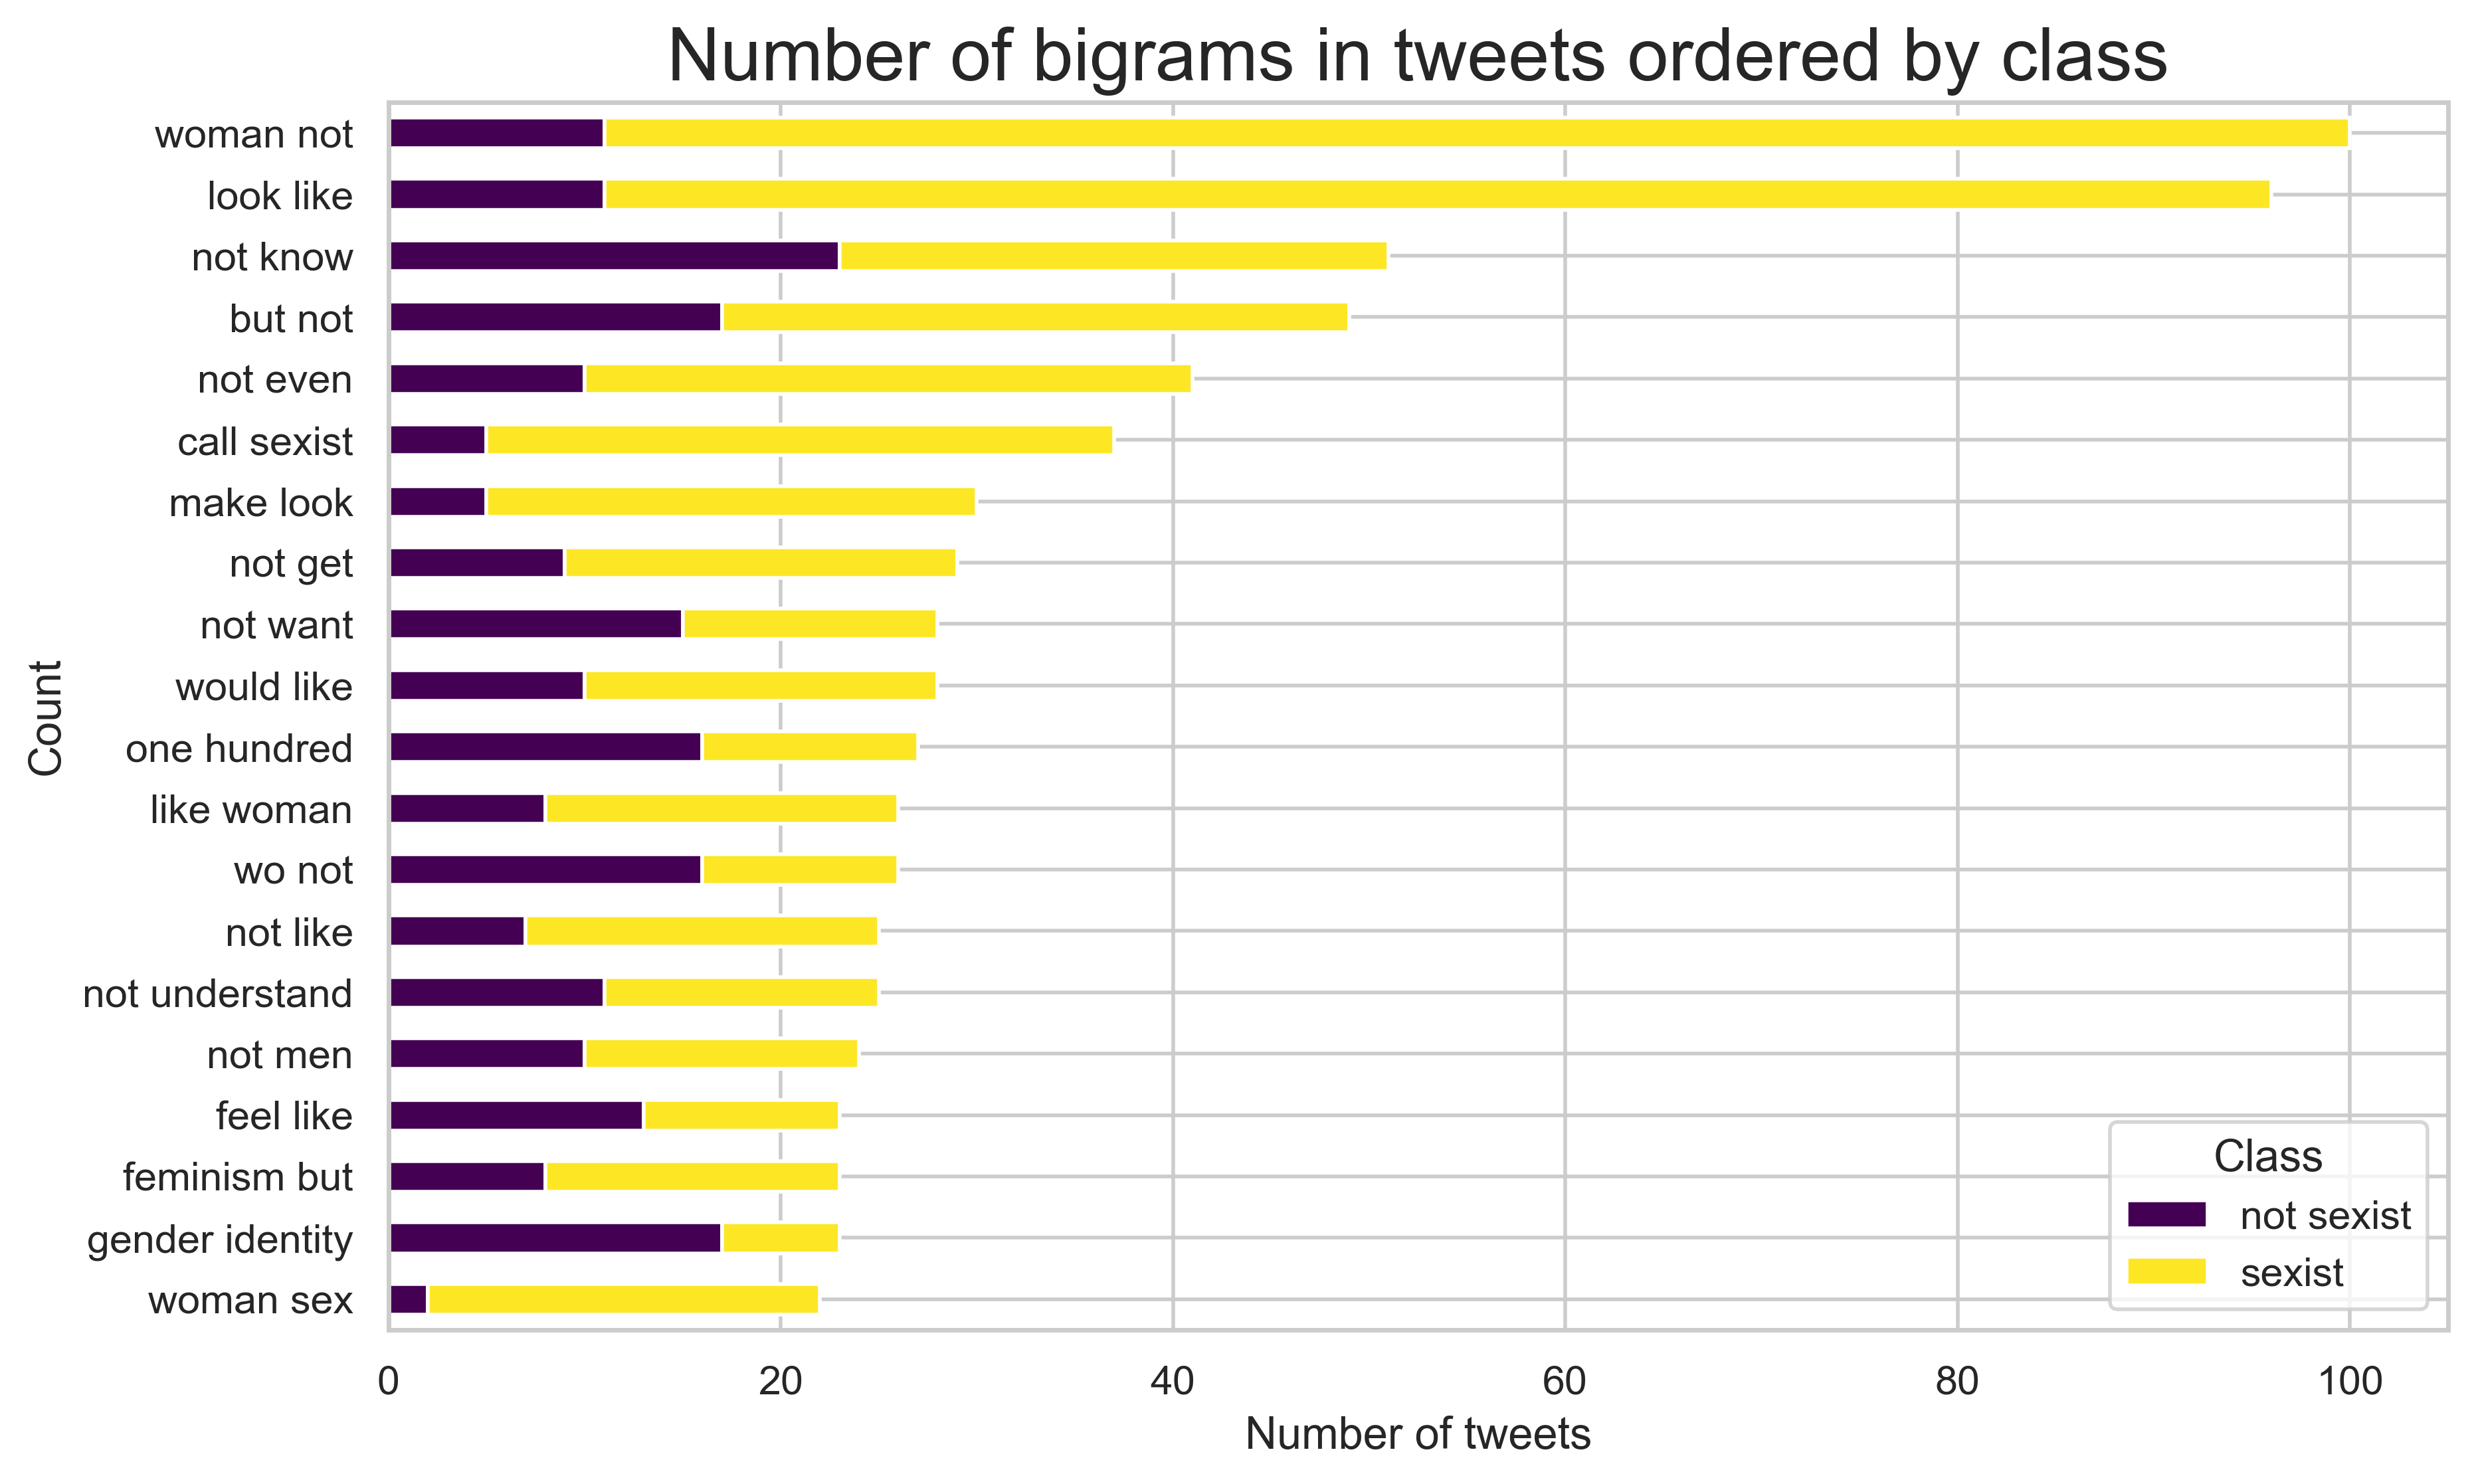

In [18]:
def generate_ngrams(text, n, type):
    words = text.split()
    ngrams = [' '.join(words[i:i + n]) for i in range(len(words) - n + 1)]
    types = [type] * len(ngrams)
    
    return (ngrams, types)

n_grams = []
types = []
for text in df[df['class'] == True]['no stopwords']:
    g, t = generate_ngrams(text, 2, "sexist")
    n_grams += g
    types += t
for text in df[df['class'] == False]['no stopwords']:
    g, t = generate_ngrams(text, 2, "not sexist")
    n_grams += g
    types += t

data = pd.DataFrame({
    'n_grams': n_grams,
    'types': types
})
# print(data)

# count_data = data.groupby(['a', 'b']).size().unstack(fill_value=0).sort_values(by=["sexist"]).head(10)
count_data = (
    data.groupby(['n_grams', 'types']).size()
    .unstack(fill_value=0)
    .assign(total=lambda x: x.sum(axis=1))
    .sort_values(by="total", ascending=False)
    .drop(columns="total")
    .head(20)
)
# print(count_data)

count_data.plot(kind='barh', stacked=True, figsize=(10, 6), colormap="viridis")
plt.title("Number of bigrams in tweets ordered by class", fontsize=20)
plt.xlabel("Number of tweets")
plt.ylabel("Count")
plt.legend(title="Class")
plt.gca().invert_yaxis()
plt.gcf().set_dpi(400)
plt.show()

### Trigrams sorted by class

In [19]:
def generate_ngrams(text, n, type):
    words = text.split()
    ngrams = [' '.join(words[i:i + n]) for i in range(len(words) - n + 1)]
    types = [type] * len(ngrams)
    
    return (ngrams, types)

n_grams = []
types = []
for text in df[df['class'] == True]['no stopwords']:
    g, t = generate_ngrams(text, 2, "sexist")
    n_grams += g
    types += t
for text in df[df['class'] == False]['no stopwords']:
    g, t = generate_ngrams(text, 2, "not sexist")
    n_grams += g
    types += t

data = pd.DataFrame({
    'n_grams': n_grams,
    'types': types
})
# print(data)
color_map = ['#fde725', '#440154']
count_data = data.groupby(['n_grams', 'types']).size().unstack(fill_value=0)

# Filter for top 50 trigrams in the "sexist" category
top_sexist = count_data['sexist'].nlargest(20).index
filtered_data = count_data.loc[top_sexist]
filtered_data = filtered_data[['sexist', 'not sexist']]

filtered_data.plot(kind='barh', stacked=True, figsize=(10, 10), colormap=lambda x: color_map[int(x)])
plt.title("Number of bigrams in sexist tweets ordered by class", fontsize=20)
plt.xlabel("Number of tweets")
plt.ylabel("Count")
plt.legend(title="Class")
plt.gca().invert_yaxis()
plt.gcf().set_dpi(150)
plt.show()

'\nfiltered_data.plot(kind=\'barh\', stacked=True, figsize=(10, 10), colormap=lambda x: color_map[int(x)])\nplt.title("Number of bigrams in sexist tweets ordered by class", fontsize=20)\nplt.xlabel("Number of tweets")\nplt.ylabel("Count")\nplt.legend(title="Class")\nplt.gca().invert_yaxis()\nplt.gcf().set_dpi(150)\nplt.show()'

In [20]:
def convert_emojis(text):
    stext = text.split()
    for i in range(len(stext)):
        if stext[i] == "pound_banknote":
            stext[i] = emoji.emojize(":pound_banknote:")
    return " ".join(stext)
        

def generate_ngrams(text, n, type):
    words = text.split()
    ngrams = [convert_emojis(' '.join(words[i:i + n])) for i in range(len(words) - n + 1)]
    # ngrams = [' '.join(words[i:i + n]) for i in range(len(words) - n + 1)]
    types = [type] * len(ngrams)
    
    return (ngrams, types)

n_grams = []
types = []
for text in df[df['class'] == True]['no stopwords']:
    g, t = generate_ngrams(text, 2, "sexist")
    n_grams += g
    types += t
for text in df[df['class'] == False]['no stopwords']:
    g, t = generate_ngrams(text, 2, "not sexist")
    n_grams += g
    types += t

data = pd.DataFrame({
    'n_grams': n_grams,
    'types': types
})
# print(data)

count_data = data.groupby(['n_grams', 'types']).size().unstack(fill_value=0)

# Filter for top 50 trigrams in the "sexist" category
top_non_sexist = count_data['not sexist'].nlargest(22).index
filtered_data = count_data.loc[top_non_sexist]

filtered_data.plot(kind='barh', stacked=True, figsize=(10, 10), colormap="viridis")
plt.title("Number of bigrams in non sexist tweets ordered by class", fontsize=20)
plt.xlabel("Number of tweets")
plt.ylabel("Count")
plt.legend(title="Class")
plt.gca().invert_yaxis()
plt.gcf().set_dpi(150)
plt.show()

'\nfiltered_data.plot(kind=\'barh\', stacked=True, figsize=(10, 10), colormap="viridis")\nplt.title("Number of bigrams in non sexist tweets ordered by class", fontsize=20)\nplt.xlabel("Number of tweets")\nplt.ylabel("Count")\nplt.legend(title="Class")\nplt.gca().invert_yaxis()\nplt.gcf().set_dpi(150)\nplt.show()'

# Word count 

In [21]:
plt.rcParams['figure.figsize'] = (13.0, 6.0)
bins = range(0, max(df["num-words"]) + 1, 2)
plt.hist(df[df["class"] == True]["num-words"], alpha = 0.6, bins=bins, label='Sexist', color="blue")
plt.hist(df[df["class"] == False]["num-words"], alpha = 0.6, bins=bins, label='Not sexist', color="red")
plt.xlabel('length')
plt.ylabel('numbers')
plt.gcf().set_dpi(150)
plt.legend(loc='upper right')
plt.xlim(0,60)
plt.grid()
plt.title('word count in each class', fontsize=20)
plt.show()

'\nbins = range(0, max(df["num-words"]) + 1, 2)\nplt.hist(df[df["class"] == True]["num-words"], alpha = 0.6, bins=bins, label=\'Sexist\', color="blue")\nplt.hist(df[df["class"] == False]["num-words"], alpha = 0.6, bins=bins, label=\'Not sexist\', color="red")\nplt.xlabel(\'length\')\nplt.ylabel(\'numbers\')\nplt.gcf().set_dpi(150)\nplt.legend(loc=\'upper right\')\nplt.xlim(0,60)\nplt.grid()\nplt.title(\'word count in each class\', fontsize=20)\nplt.show()'

# Char count

In [22]:

plt.rcParams['figure.figsize'] = (14.0, 6.0)
bins = range(min(df["num-chars"]), max(df["num-chars"]) + 1, 2)
plt.hist(df[df["class"] == True]["num-chars"], alpha = 0.6, bins=bins, label='Sexist', color="blue")
plt.hist(df[df["class"] == False]["num-chars"], alpha = 0.6, bins=bins, label='Not sexist', color="red")
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(25,340)
plt.ylim(0,180)
plt.grid()
plt.gcf().set_dpi(150)
plt.title('char count per tweet', fontsize=20)
plt.show()

'\nplt.rcParams[\'figure.figsize\'] = (14.0, 6.0)\nbins = range(min(df["num-chars"]), max(df["num-chars"]) + 1, 2)\nplt.hist(df[df["class"] == True]["num-chars"], alpha = 0.6, bins=bins, label=\'Sexist\', color="blue")\nplt.hist(df[df["class"] == False]["num-chars"], alpha = 0.6, bins=bins, label=\'Not sexist\', color="red")\nplt.xlabel(\'length\')\nplt.ylabel(\'numbers\')\nplt.legend(loc=\'upper right\')\nplt.xlim(25,340)\nplt.ylim(0,180)\nplt.grid()\nplt.gcf().set_dpi(150)\nplt.title(\'char count per tweet\', fontsize=20)\nplt.show()'

# AVG char per word count

In [23]:

plt.rcParams['figure.figsize'] = (6.0, 6.0)
bins = range(min(df["avg-chars-per-word"]), max(df["avg-chars-per-word"]) + 1, 2)
plt.hist(df[df["class"] == True]["avg-chars-per-word"], alpha = 0.6, bins=bins, label='Sexist', color="blue")
plt.hist(df[df["class"] == False]["avg-chars-per-word"], alpha = 0.6, bins=bins, label='Not sexist', color="red")
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,20)
plt.ylim(0,800)
plt.grid()
plt.title('Char count per word', fontsize=20)
plt.show()

'plt.rcParams[\'figure.figsize\'] = (6.0, 6.0)\nbins = range(min(df["avg-chars-per-word"]), max(df["avg-chars-per-word"]) + 1, 2)\nplt.hist(df[df["class"] == True]["avg-chars-per-word"], alpha = 0.6, bins=bins, label=\'Sexist\', color="blue")\nplt.hist(df[df["class"] == False]["avg-chars-per-word"], alpha = 0.6, bins=bins, label=\'Not sexist\', color="red")\nplt.xlabel(\'length\')\nplt.ylabel(\'numbers\')\nplt.legend(loc=\'upper right\')\nplt.xlim(0,20)\nplt.ylim(0,800)\nplt.grid()\nplt.title(\'Char count per word\', fontsize=20)\nplt.show()'

# Emoji Analysis

Process the original data and filter out the emojis

In [24]:
def get_emojis(text):
    text = re.sub(r":", "", text)
    only_text = emoji.demojize(text)
    only_emojis = re.findall(r':([^:]*):', only_text)
    return only_emojis

df["emojis"] = df.apply(lambda row: get_emojis(row["tweet"]), axis=1)

list_of_emojis = []
sexist_emojis = []
non_sexist_emojis = []

for e in df["emojis"]:
    list_of_emojis += list(filter(lambda x: not (x == ""), e))

for e in df[df["class"] == True]["emojis"]:
    sexist_emojis += list(filter(lambda x: not (x == ""), e))
    
for e in df[df["class"] == False]["emojis"]:
    non_sexist_emojis += list(filter(lambda x: not (x == ""), e))
    
    
    
print((set(list_of_emojis)))

{'thumbs_down', 'doughnut', 'smiling_face_with_smiling_eyes', 'heart_suit', 'yawning_face', 'police_car_light', 'exclamation_question_mark', 'OK_hand_light_skin_tone', 'white_heart', 'pushpin', 'partying_face', 'face_with_symbols_on_mouth', 'face_with_rolling_eyes', 'persevering_face', 'birthday_cake', 'thumbs_up_medium-light_skin_tone', 'sun', 'red_exclamation_mark', 'woman_shrugging_light_skin_tone', 'Ghana', 'raising_hands_light_skin_tone', 'pleading_face', 'man_facepalming_medium-dark_skin_tone', 'OK_hand', 'women_wrestling', 'clapping_hands_light_skin_tone', 'cross_mark', 'grinning_face_with_big_eyes', 'shaved_ice', 'double_exclamation_mark', 'Iran', 'smiling_face_with_sunglasses', 'red_heart', 'face_with_open_mouth', 'grinning_squinting_face', 'round_pushpin', 'P_button', 'thinking_face', 'sparkling_heart', 'money_bag', 'keycap_3', 'ring', 'kiss_mark', 'confetti_ball', 'upside-down_face', 'man_tipping_hand_dark_skin_tone', 'rugby_football', 'man_shrugging_dark_skin_tone', 'see-no

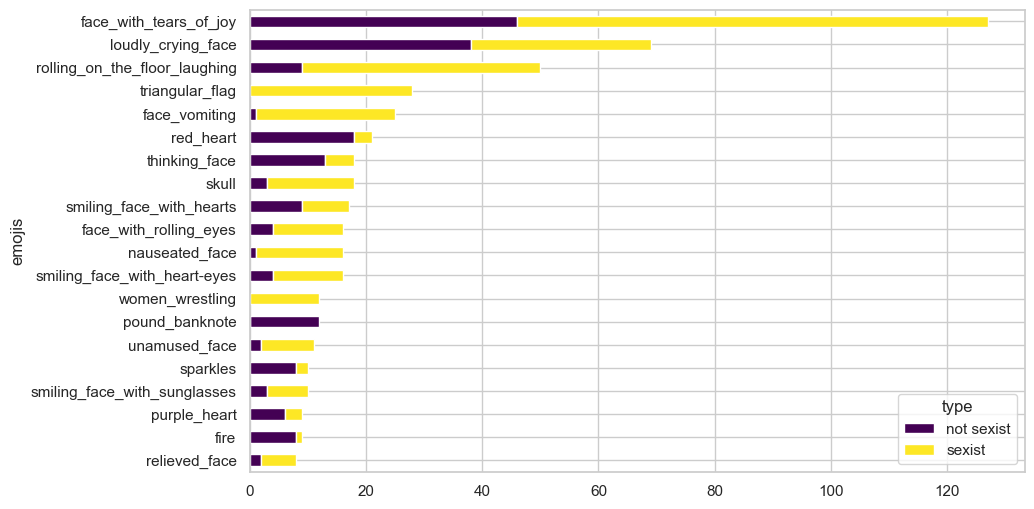

In [25]:
emoji_data = pd.DataFrame({
    "emojis": sexist_emojis + non_sexist_emojis,
    "type": (["sexist"] * len(sexist_emojis)) + (["not sexist"] * len(non_sexist_emojis))
})

# grouped_emojis = emoji_data.groupby(["emojis", "type"]).size().unstack(fill_value=0).head(20)
grouped_emojis = (
    emoji_data.groupby(['emojis', 'type']).size()
    .unstack(fill_value=0)
    .assign(total=lambda x: x.sum(axis=1))
    .sort_values(by="total", ascending=False)
    .drop(columns="total")
    .head(20)
)

grouped_emojis.plot(kind='barh', stacked=True, figsize=(10, 6), colormap="viridis")
plt.gca().invert_yaxis()

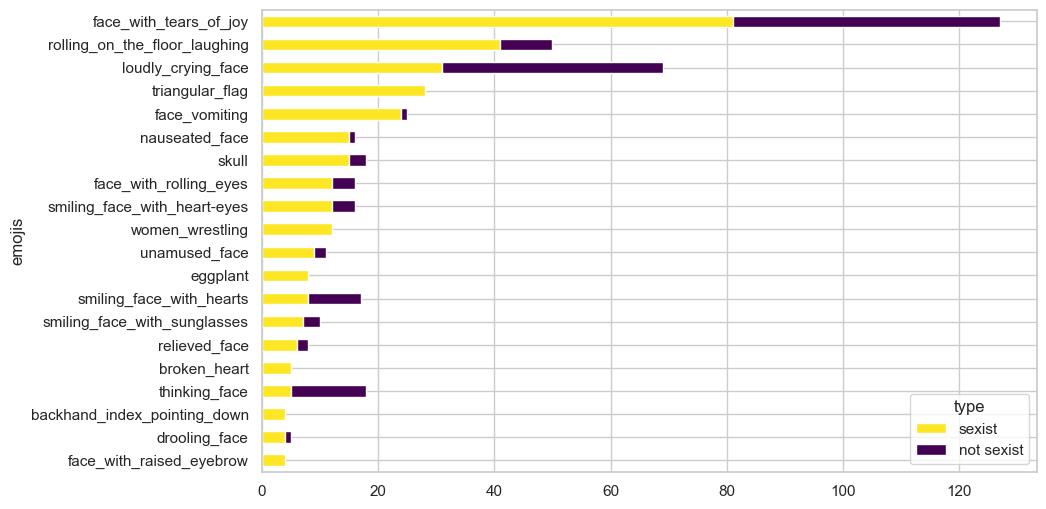

In [26]:
emoji_data = pd.DataFrame({
    "emojis": sexist_emojis + non_sexist_emojis,
    "type": (["sexist"] * len(sexist_emojis)) + (["not sexist"] * len(non_sexist_emojis))
})

grouped_emojis = emoji_data.groupby(["emojis", "type"]).size().unstack(fill_value=0)
top_sexist = grouped_emojis['sexist'].nlargest(20).index
filtered_data = grouped_emojis.loc[top_sexist]
filtered_data = filtered_data[['sexist', 'not sexist']]

filtered_data.plot(kind='barh', stacked=True, figsize=(10, 6), colormap=lambda x: color_map[int(x)])
plt.gca().invert_yaxis()

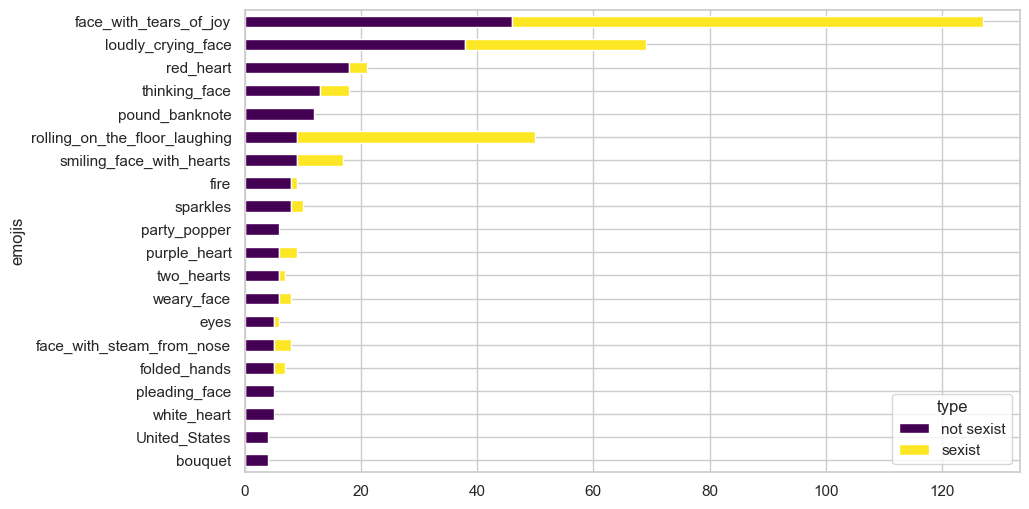

In [27]:
emoji_data = pd.DataFrame({
    "emojis": sexist_emojis + non_sexist_emojis,
    "type": (["sexist"] * len(sexist_emojis)) + (["not sexist"] * len(non_sexist_emojis))
})

grouped_emojis = emoji_data.groupby(["emojis", "type"]).size().unstack(fill_value=0)
top_sexist = grouped_emojis['not sexist'].nlargest(20).index
filtered_data = grouped_emojis.loc[top_sexist]
# filtered_data = filtered_data[['sexist', 'not sexist']]

filtered_data.plot(kind='barh', stacked=True, figsize=(10, 6), colormap="viridis")
plt.gca().invert_yaxis()

['😂', '🤣', '😭', '🚩', '🤮', '🤢', '💀', '🙄', '🤼\u200d♀️', '😍', '😒', '🍆', '🥰', '😎', '😌', '💔', '🤔', '🥴', '🤨', '👍', '😬', '🙈', '👇', '😏', '🤤', '😈', '😜', '💋', '🤡', '⛓️']


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128514 (\N{FACE WITH TEARS OF JOY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128557 (\N{LOUDLY CRYING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128681 (\N{TRIANGULAR FLAG ON POST}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/l

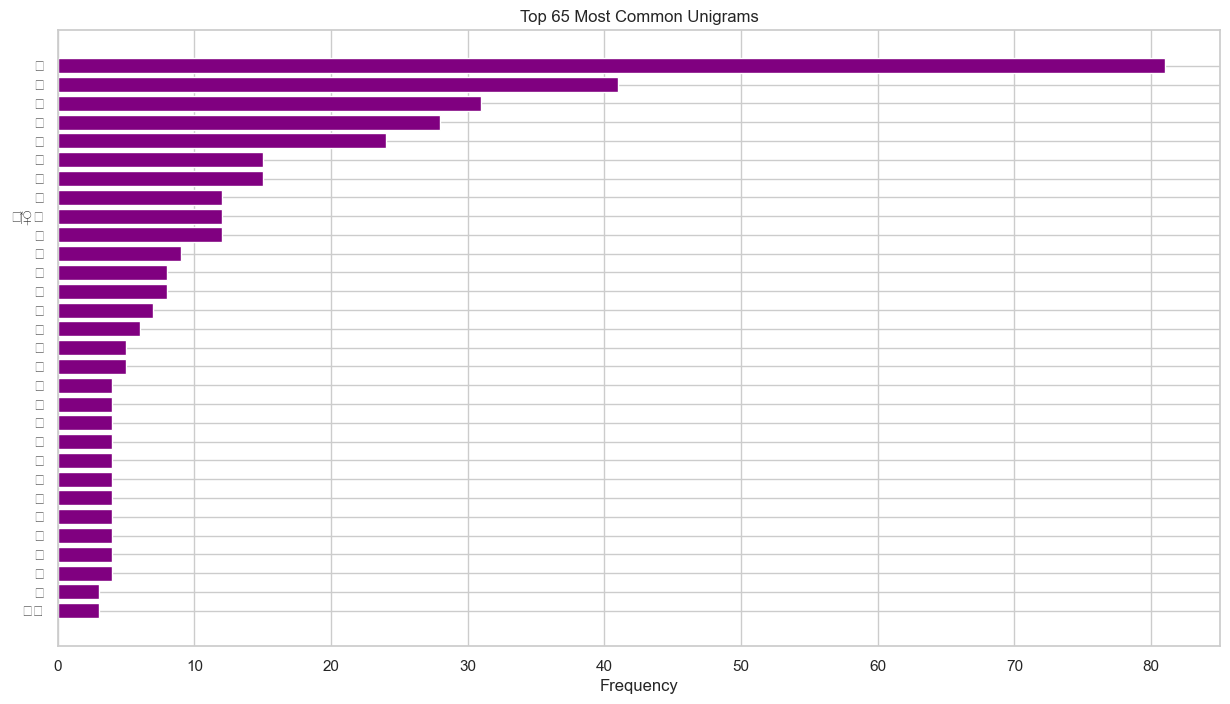

In [28]:

from matplotlib import rcParams

counter = Counter(sexist_emojis)
mco = counter.most_common(30)
emojis, emoji_counts = zip(*mco)
emojis = list(map(lambda e: emoji.emojize(":"+e+":"), emojis))
print(emojis)

# Plotting
plt.figure(figsize=(15, 8))
plt.barh(emojis, emoji_counts, color='purple')
plt.xlabel('Frequency')
plt.title('Top 65 Most Common Unigrams')
plt.gca().invert_yaxis() 
plt.show()

# Sentiment Analysis

In [29]:
analyzer = SentimentIntensityAnalyzer()

df["vader-sentiment"] = df.apply(lambda row: analyzer.polarity_scores(row["clean"])["compound"], axis=1)
df["vader-neg"] = df.apply(lambda row: analyzer.polarity_scores(row["clean"])["neg"], axis=1)
df["vader-neu"] = df.apply(lambda row: analyzer.polarity_scores(row["clean"])["neu"], axis=1)
df["vader-pos"] = df.apply(lambda row: analyzer.polarity_scores(row["clean"])["pos"], axis=1)

fig, axes = plt.subplots(8, 1, figsize=(6, 8), sharex=False)
sns.boxplot(x=df[df["class"] == True]["vader-sentiment"], ax=axes[0], color="skyblue")
sns.boxplot(x=df[df["class"] == False]["vader-sentiment"], ax=axes[1], color="skyblue")
sns.boxplot(x=df[df["class"] == True]["vader-neg"], ax=axes[2], color="skyblue")
sns.boxplot(x=df[df["class"] == False]["vader-neg"], ax=axes[3], color="skyblue")
sns.boxplot(x=df[df["class"] == True]["vader-neu"], ax=axes[4], color="skyblue")
sns.boxplot(x=df[df["class"] == False]["vader-neu"], ax=axes[5], color="skyblue")
sns.boxplot(x=df[df["class"] == True]["vader-pos"], ax=axes[6], color="skyblue")
sns.boxplot(x=df[df["class"] == False]["vader-pos"], ax=axes[7], color="skyblue")


'\nfig, axes = plt.subplots(8, 1, figsize=(6, 8), sharex=False)\nsns.boxplot(x=df[df["class"] == True]["vader-sentiment"], ax=axes[0], color="skyblue")\nsns.boxplot(x=df[df["class"] == False]["vader-sentiment"], ax=axes[1], color="skyblue")\nsns.boxplot(x=df[df["class"] == True]["vader-neg"], ax=axes[2], color="skyblue")\nsns.boxplot(x=df[df["class"] == False]["vader-neg"], ax=axes[3], color="skyblue")\nsns.boxplot(x=df[df["class"] == True]["vader-neu"], ax=axes[4], color="skyblue")\nsns.boxplot(x=df[df["class"] == False]["vader-neu"], ax=axes[5], color="skyblue")\nsns.boxplot(x=df[df["class"] == True]["vader-pos"], ax=axes[6], color="skyblue")\nsns.boxplot(x=df[df["class"] == False]["vader-pos"], ax=axes[7], color="skyblue")'

In [30]:
df["blob-polarity"] = df.apply(lambda row: TextBlob(row["clean"]).subjectivity, axis=1)
df["blob-subjectivity"] = df.apply(lambda row: TextBlob(row["clean"]).subjectivity, axis=1)

fig, axes = plt.subplots(2, 1, figsize=(6, 8), sharex=False)
sns.boxplot(x=df[df["class"] == True]["blob-polarity"], ax=axes[0], color="skyblue")
sns.boxplot(x=df[df["class"] == False]["blob-polarity"], ax=axes[1], color="skyblue")

'fig, axes = plt.subplots(2, 1, figsize=(6, 8), sharex=False)\nsns.boxplot(x=df[df["class"] == True]["blob-polarity"], ax=axes[0], color="skyblue")\nsns.boxplot(x=df[df["class"] == False]["blob-polarity"], ax=axes[1], color="skyblue")'

In [31]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8), sharex=False)

axes=axes.flatten()
# VADER
sns.boxplot(x=df[df["class"] == True]["vader-sentiment"], ax=axes[0], color="skyblue")
sns.boxplot(x=df[df["class"] == False]["vader-sentiment"], ax=axes[3], color="skyblue")
# BLOB polarity
sns.boxplot(x=df[df["class"] == True]["blob-polarity"], ax=axes[1], color="salmon")
sns.boxplot(x=df[df["class"] == False]["blob-polarity"], ax=axes[4], color="red")
# BLOB sentiment
sns.boxplot(x=df[df["class"] == True]["blob-subjectivity"], ax=axes[2], color="skyblue")
sns.boxplot(x=df[df["class"] == False]["blob-subjectivity"], ax=axes[5], color="skyblue")

axes[0].set_ylabel("sexist tweets", fontsize=20)
axes[3].set_ylabel("non sexist tweets", fontsize=20)

axes[0].set_xlabel("VADER sentiment", labelpad=20,fontsize=20)
axes[1].set_xlabel("Blob polarity", labelpad=20,fontsize=20)
axes[2].set_xlabel("Blob subjectivity", labelpad=20,fontsize=20)

axes[0].xaxis.set_label_position('top')
axes[1].xaxis.set_label_position('top')
axes[2].xaxis.set_label_position('top')

axes[3].set_xlabel("")
axes[4].set_xlabel("")
axes[5].set_xlabel("")

'fig, axes = plt.subplots(2, 3, figsize=(18, 8), sharex=False)\n\naxes=axes.flatten()\n# VADER\nsns.boxplot(x=df[df["class"] == True]["vader-sentiment"], ax=axes[0], color="skyblue")\nsns.boxplot(x=df[df["class"] == False]["vader-sentiment"], ax=axes[3], color="skyblue")\n# BLOB polarity\nsns.boxplot(x=df[df["class"] == True]["blob-polarity"], ax=axes[1], color="salmon")\nsns.boxplot(x=df[df["class"] == False]["blob-polarity"], ax=axes[4], color="red")\n# BLOB sentiment\nsns.boxplot(x=df[df["class"] == True]["blob-subjectivity"], ax=axes[2], color="skyblue")\nsns.boxplot(x=df[df["class"] == False]["blob-subjectivity"], ax=axes[5], color="skyblue")\n\naxes[0].set_ylabel("sexist tweets", fontsize=20)\naxes[3].set_ylabel("non sexist tweets", fontsize=20)\n\naxes[0].set_xlabel("VADER sentiment", labelpad=20,fontsize=20)\naxes[1].set_xlabel("Blob polarity", labelpad=20,fontsize=20)\naxes[2].set_xlabel("Blob subjectivity", labelpad=20,fontsize=20)\n\naxes[0].xaxis.set_label_position(\'top\')

# Annotator Fun

In [32]:
male = 0
female = 0

age18 = 0
age23 = 0
age46 = 0

def get_genders(g):
    m = 0
    f = 0
    for i in g:
        if i == "M":
            m+=1
        elif i == "F":
            f+=1
    return (m,f)

def get_age(a):
    a18 = 0
    a23 = 0
    a46 = 0
    
    for i in a:
        if i == "1":
            a18+=1
        elif i == "5":
            a23+=1
        elif i == "6":
            a46+=1
    return (a18,a23,a46)        
    


for i, r in df.iterrows():
    m,f = get_genders(r["gender_annotators"])
    male+=m
    female+=f
    a18,a23,a46 = get_age(r["age_annotators"])
    age18+=a18
    age23+=a23
    age46+=a46
    
print(male,female)
print(age18, age23, age46)


8997 8997
5998 5998 5998


In [33]:
df 


,tweet,number_annotators,annotators,gender_annotators,age_annotators,ethnicities_annotators,study_levels_annotators,countries_annotators,labels,num-chars,...,class,clean,no stopwords,emojis,vader-sentiment,vader-neg,vader-neu,vader-pos,blob-polarity,blob-subjectivity
0,@terryflewers Abuse is wrong but telling him t...,6,"['Annotator_461', 'Annotator_462', 'Annotator_...","['F', 'F', 'M', 'M', 'M', 'F']","['18-22', '23-45', '18-22', '23-45', '46+', '4...","['Asian', 'White or Caucasian', 'White or Cauc...","['Bachelor’s degree', 'Bachelor’s degree', 'Hi...","['United Kingdom', 'Poland', 'Portugal', 'Sout...","['NO', 'YES', 'NO', 'NO', 'NO', 'NO']",134,...,False,abuse is wrong but telling him to shut the fu...,abuse wrong but telling shut fuck put performa...,[],-0.7243,0.279,0.623,0.099,0.800000,0.800000
1,@thestephaniewat It’s also mansplaining to tel...,6,"['Annotator_508', 'Annotator_509', 'Annotator_...","['F', 'F', 'M', 'M', 'M', 'F']","['18-22', '23-45', '18-22', '23-45', '46+', '4...","['White or Caucasian', 'White or Caucasian', '...","['High school degree or equivalent', 'Master’s...","['Portugal', 'Australia', 'Mexico', 'Portugal'...","['YES', 'YES', 'YES', 'NO', 'YES', 'NO']",251,...,True,it is also mansplaining to tell a heroic heal...,also mansplaining tell heroic health care work...,[],0.7902,0.048,0.743,0.209,0.750000,0.750000
2,Prince Harry in therapy thanks to his wife..sh...,6,"['Annotator_590', 'Annotator_591', 'Annotator_...","['F', 'F', 'M', 'M', 'M', 'F']","['18-22', '23-45', '18-22', '23-45', '46+', '4...","['White or Caucasian', 'Black or African Ameri...","['High school degree or equivalent', 'High sch...","['Italy', 'South Africa', 'Poland', 'Mexico', ...","['YES', 'YES', 'YES', 'YES', 'YES', 'YES']",277,...,True,prince harry in therapy thanks to his wife she...,prince harry therapy thanks wife gold digger o...,[],0.4767,0.000,0.926,0.074,0.441667,0.441667
3,@PepperOceanna My conservative Mom forcing me ...,6,"['Annotator_473', 'Annotator_474', 'Annotator_...","['F', 'F', 'M', 'M', 'M', 'F']","['18-22', '23-45', '18-22', '23-45', '46+', '4...","['Hispano or Latino', 'White or Caucasian', 'W...","['High school degree or equivalent', 'Bachelor...","['Mexico', 'Portugal', 'Poland', 'Hungary', 'U...","['YES', 'YES', 'YES', 'NO', 'YES', 'YES']",159,...,True,my conservative mom forcing me to watch an ep...,conservative mom forcing watch episode rush li...,[face_with_rolling_eyes],0.0000,0.000,1.000,0.000,0.211111,0.211111
4,"Not unreasonable, but you look like a bitch fo...",6,"['Annotator_415', 'Annotator_416', 'Annotator_...","['F', 'F', 'M', 'M', 'M', 'F']","['18-22', '23-45', '18-22', '23-45', '46+', '4...","['White or Caucasian', 'Multiracial', 'White o...","['High school degree or equivalent', 'Bachelor...","['Slovenia', 'Netherlands', 'United Kingdom', ...","['NO', 'YES', 'NO', 'YES', 'YES', 'YES']",156,...,True,not unreasonable but you look like a bitch for...,not unreasonable but look like bitch making an...,[],-0.1531,0.226,0.537,0.237,0.700000,0.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,"@ncostanzo24 He’s the man, so much better than...",6,"['Annotator_484', 'Annotator_485', 'Annotator_...","['F', 'F', 'M', 'M', 'M', 'F']","['18-22', '23-45', '18-22', '23-45', '46+', '4...","['White or Caucasian', 'White or Caucasian', '...","['High school degree or equivalent', 'Bachelor...","['Poland', 'Greece', 'South Africa', 'Poland',...","['NO', 'NO', 'YES', 'NO', 'NO', 'NO']",162,...,False,he is the man so much better than half it the...,man much better half analyst tv company hire i...,[rolling_on_the_floor_laughing],0.4902,0.000,0.904,0.096,0.333333,0.333333
2995,@GlobalWarningEB @Matthews_angst Ahh… so a new...,6,"['Annotator_397', 'Annotator_398', 'Annotator_...","['F', 'F', 'M', 'M', 'M', 'F']","['18-22', '23-45', '18-22', '23-45', '46+', '4...","['White or Caucasian', 'White or Caucasian', '...","['High school degree or equivalent', 'Master’s..

## Convert boolean 'class' column to numeric values

In [34]:
df['class_numeric'] = df['class'].apply(lambda x: 1 if x else 0)

print(df["class"])

0       False
1        True
2        True
3        True
4        True
        ...  
2994    False
2995     True
2996     True
2997    False
2998    False
Name: class, Length: 2999, dtype: bool


## Text Vectorization and Model Evaluation without Cross-Validation or Hyperparameter Tuning

In [35]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Beispiel-Daten
# df = ... (Deine Daten einfügen: df["no stopwords"] und df["class_numeric"])

# Vektorisierungsverfahren
vectorizers = {
    "BoW": CountVectorizer(),
    "TF-IDF": TfidfVectorizer()
}

# Modelle
models = {
    "SVM": SVC(kernel='linear', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "NB": MultinomialNB()
}

# Ergebnisse speichern
results = []

# Vektorisierung und Modellvergleich
for vec_name, vectorizer in vectorizers.items():
    # Textdaten vektorisieren
    X = vectorizer.fit_transform(df["no stopwords"])
    y = df["class_numeric"]

    # Daten aufteilen
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    for model_name, model in models.items():
        # Modell trainieren
        model.fit(X_train, y_train)

        # Vorhersagen
        y_pred = model.predict(X_test)

        # Leistung bewerten
        acc = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)

        # Beispiel: Metriken für Klasse '1' extrahieren (positiv, falls binär)
        precision = report["1"]["precision"] if "1" in report else None
        recall = report["1"]["recall"] if "1" in report else None
        f1_score = report["1"]["f1-score"] if "1" in report else None

        # Wenn der Datensatz mehrere Klassen hat, könnten wir stattdessen die gewichteten Durchschnittswerte verwenden
        # weighted_precision = report["weighted avg"]["precision"]
        # weighted_recall = report["weighted avg"]["recall"]
        # weighted_f1_score = report["weighted avg"]["f1-score"]

        # Ergebnisse speichern
        results.append({
            "Vectorizer": vec_name,
            "Model": model_name,
            "Accuracy": acc,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1_score
        })

# Ergebnisse als DataFrame darstellen
results_df = pd.DataFrame(results)
print(results_df)


  Vectorizer          Model  Accuracy  Precision    Recall  F1-Score
0        BoW            SVM  0.723333   0.690554  0.749117  0.718644
1        BoW  Random Forest  0.751667   0.716129  0.784452  0.748735
2        BoW             NB  0.735000   0.676136  0.840989  0.749606
3     TF-IDF            SVM  0.753333   0.750929  0.713781  0.731884
4     TF-IDF  Random Forest  0.736667   0.720848  0.720848  0.720848
5     TF-IDF             NB  0.735000   0.705298  0.752650  0.728205


## Visualizing Model Performance Metrics for Different Vectorizers


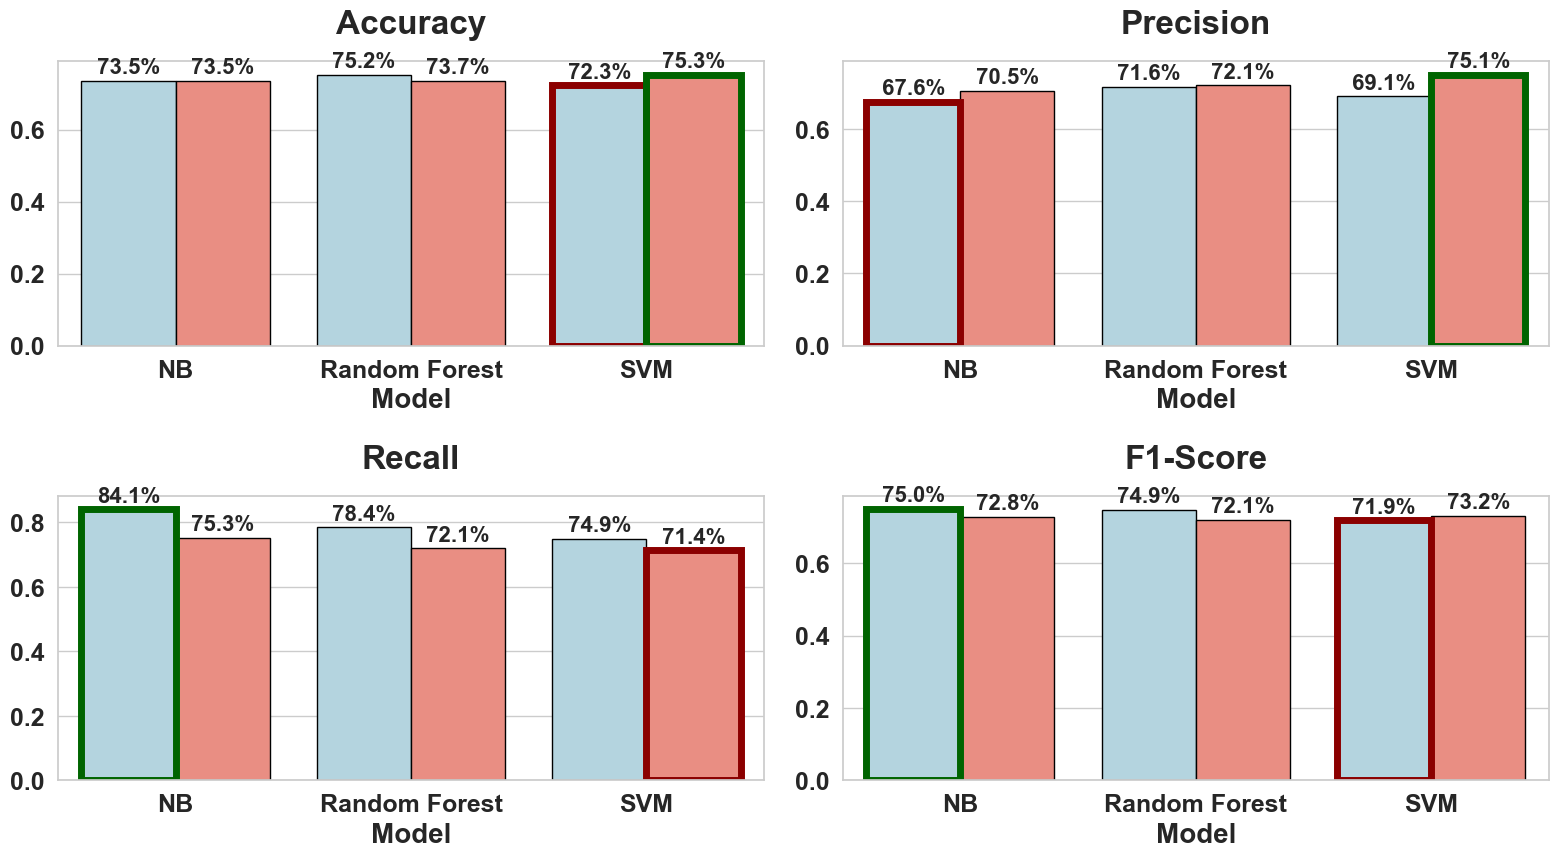

In [36]:

# Ergebnisse sortieren nach Vektorisierer und Modell
results_df.sort_values(by=["Vectorizer", "Model"], inplace=True)

# Metriken, die dargestellt werden sollen
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]

# Balkenfarben und Stil
plt.figure(figsize=(16, 9))  # Höhe reduziert, Breite beibehalten
sns.set_theme(style="whitegrid", font_scale=1.7)

# Subplots für jede Metrik
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i + 1)
    ax = sns.barplot(
        x="Model",
        y=metric,
        data=results_df,
        hue="Vectorizer",  # Setze hue, um Farbpalette zu aktivieren
        palette={"BoW": "lightblue", "TF-IDF": "salmon"},
        edgecolor="black",
        legend=False  # Legende entfernen
    )
    
    # Beschriftung der Werte auf den Balken
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            x=p.get_x() + p.get_width() / 2,
            y=height + 0.01,
            s=f"{height:.1%}",
            ha="center",
            va="bottom",
            fontsize=16,  # Schriftgröße der Werte auf den Balken erhöht
            fontweight="bold"
        )
    
    # Besten und schlechtesten Wert umrahmen
    best_value = results_df[metric].max()
    worst_value = results_df[metric].min()
    for p in ax.patches:
        height = p.get_height()
        if abs(height - best_value) < 1e-4:
            ax.add_patch(plt.Rectangle(
                (p.get_x(), 0),
                p.get_width(),
                height,
                fill=False,
                edgecolor='darkgreen',
                linewidth=5
            ))
        elif abs(height - worst_value) < 1e-4:
            ax.add_patch(plt.Rectangle(
                (p.get_x(), 0),
                p.get_width(),
                height,
                fill=False,
                edgecolor='darkred',
                linewidth=5
            ))
    
    # Titel und Achsenbeschriftungen
    plt.title(metric, fontweight="bold", fontsize=24,  pad=20)  # Titel größer
    plt.xlabel("Model", fontweight="bold", fontsize=20)  # X-Achse größer
    plt.ylabel("")  
    plt.xticks(fontweight="bold", fontsize=18)  # X-Achsenbeschriftungen größer
    plt.yticks(fontweight="bold", fontsize=18)  # Y-Achsenbeschriftungen größer

# Layout anpassen
plt.tight_layout()

# Grafik speichern
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')  # 'model_comparison.png' ist der Dateiname

# Grafik anzeigen
plt.show()

## Cross-Validation and Performance Visualization of Models and Vectorizers

  Vectorizer          Model  Mean Accuracy  Mean Precision  Mean Recall  \
0        BoW            SVM       0.711139        0.711984     0.711139   
1        BoW  Random Forest       0.740731        0.743983     0.740731   
2        BoW             NB       0.707797        0.720052     0.707797   
3     TF-IDF            SVM       0.739473        0.741717     0.739473   
4     TF-IDF  Random Forest       0.719884        0.722394     0.719884   
5     TF-IDF             NB       0.724475        0.726320     0.724475   

   Mean F1-Score  
0       0.710838  
1       0.740435  
2       0.706487  
3       0.737540  
4       0.718888  
5       0.724519  


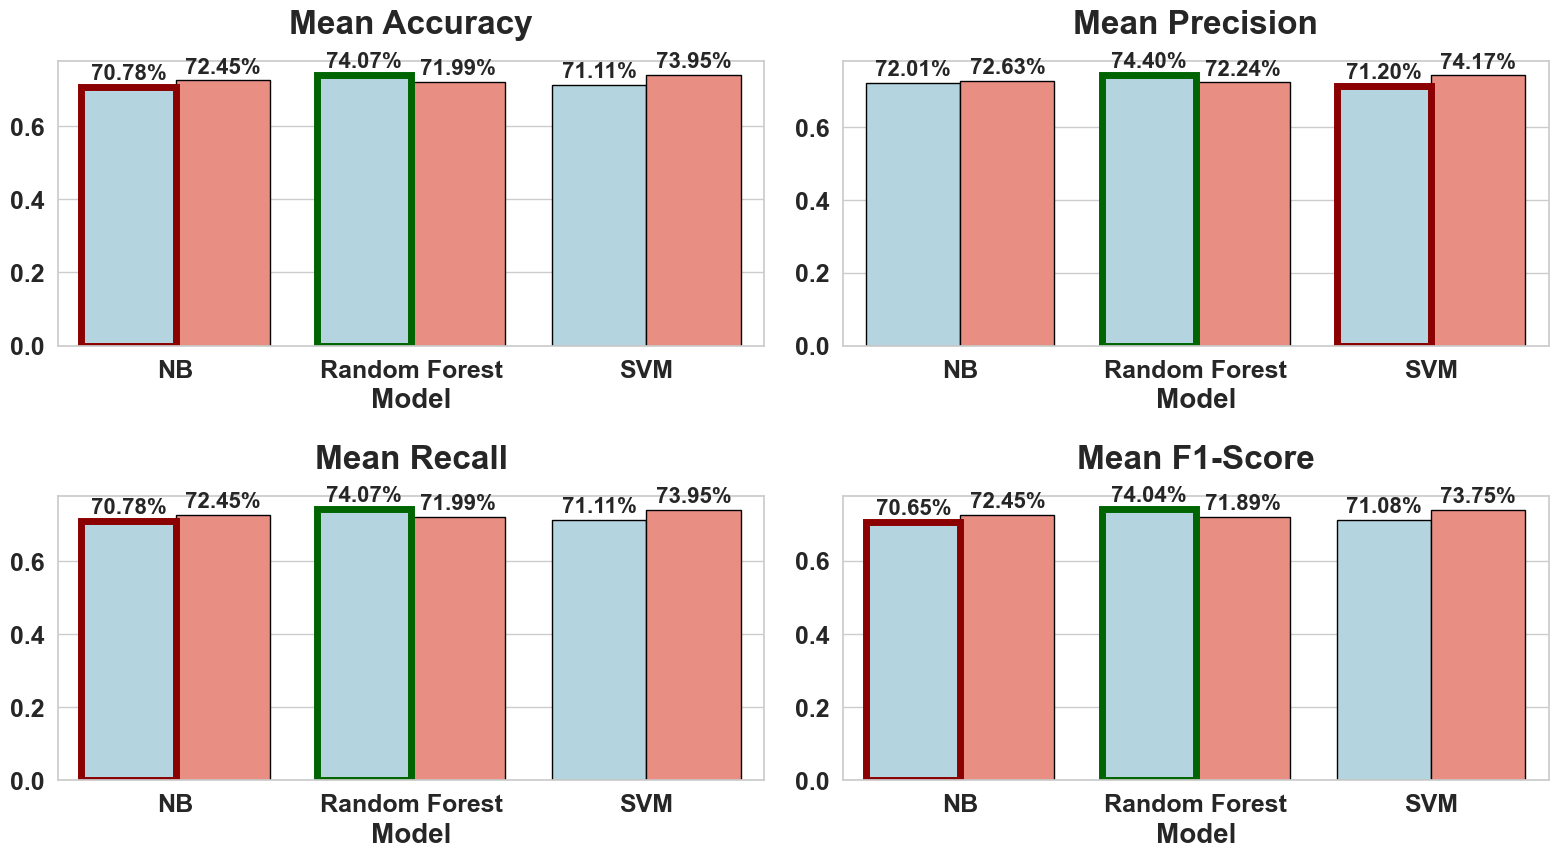

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, accuracy_score

# Beispiel-Daten (bitte ersetzen Sie dies durch Ihre eigenen Daten)
# df = ... (Ihre Daten mit den Spalten "no stopwords" und "class_numeric")

# Vektorisierungsverfahren
vectorizers = {
    "BoW": CountVectorizer(),
    "TF-IDF": TfidfVectorizer()
}

# Modelle
models = {
    "SVM": SVC(kernel='linear', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "NB": MultinomialNB()
}

# Metriken, die evaluiert werden sollen
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# Stratified K-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Ergebnisse speichern
results_summary = []

# Cross-Validation für jedes Modell und Vektorisierung
for vec_name, vectorizer in vectorizers.items():
    # Textdaten vektorisieren
    X = vectorizer.fit_transform(df["no stopwords"])
    y = df["class_numeric"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    for model_name, model in models.items():
        # Cross-Validation mit mehreren Metriken durchführen
        results = cross_validate(model, X_train, y_train, cv=cv, scoring=scoring, return_train_score=False)

        # Durchschnittswerte berechnen
        mean_results = {
            "Vectorizer": vec_name,
            "Model": model_name,
            "Mean Accuracy": np.mean(results['test_accuracy']),
            "Mean Precision": np.mean(results['test_precision']),
            "Mean Recall": np.mean(results['test_recall']),
            "Mean F1-Score": np.mean(results['test_f1'])
        }

        # Ergebnisse zu DataFrame hinzufügen
        results_summary.append(mean_results)

# In einen DataFrame umwandeln
results_df = pd.DataFrame(results_summary)
print(results_df)

# Ergebnisse sortieren nach Vektorisierer und Modell
results_df.sort_values(by=["Vectorizer", "Model"], inplace=True)

# Metriken, die dargestellt werden sollen
metrics = ["Mean Accuracy", "Mean Precision", "Mean Recall", "Mean F1-Score"]

# Balkenfarben und Stil
plt.figure(figsize=(16, 9))
sns.set_theme(style="whitegrid", font_scale=1.7)



# Subplots für jede Metrik
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i + 1)
    ax = sns.barplot(
        x="Model",
        y=metric,
        data=results_df,
        hue="Vectorizer",  # Setze hue, um Farbpalette zu aktivieren
        palette={"BoW": "lightblue", "TF-IDF": "salmon"},
        edgecolor="black",
        legend=False  # Legende entfernen
    )
    
    # Beschriftung der Werte auf den Balken
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            x=p.get_x() + p.get_width() / 2,
            y=height + 0.01,
            s=f"{height:.2%}",
            ha="center",
            va="bottom",
            fontsize=16,  # Schriftgröße der Werte auf den Balken erhöht
            fontweight="bold"
        )
    
    # Besten und schlechtesten Wert umrahmen
    best_value = results_df[metric].max()
    worst_value = results_df[metric].min()
    for p in ax.patches:
        height = p.get_height()
        if abs(height - best_value) < 1e-4:
            ax.add_patch(plt.Rectangle(
                (p.get_x(), 0),
                p.get_width(),
                height,
                fill=False,
                edgecolor='darkgreen',
                linewidth=5
            ))
        elif abs(height - worst_value) < 1e-4:
            ax.add_patch(plt.Rectangle(
                (p.get_x(), 0),
                p.get_width(),
                height,
                fill=False,
                edgecolor='darkred',
                linewidth=5
            ))
    
    # Titel und Achsenbeschriftungen
    plt.title(metric, fontweight="bold", fontsize=24, pad =20)
    plt.xlabel("Model", fontweight="bold", fontsize=20)
    plt.ylabel("")
    plt.xticks(fontweight="bold", fontsize=18)
    plt.yticks(fontweight="bold", fontsize=18)

# Layout anpassen
plt.tight_layout()

# Grafik speichern
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')

# Grafik anzeigen
#plt.show()


## Grid Search Hyperparameter Tuning for Random Forest with Bag-of-Words

In [38]:
v = CountVectorizer()
X = v.fit_transform(df["no stopwords"])
y = df["class_numeric"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [ 90, 92, 94, 95],  # Anzahl der Bäume
    'max_depth': [None, 5, 10],
    'min_samples_split': [10, 15,20,30],
    'min_samples_leaf': [ 3, 4, 5, 8, 10],
    'bootstrap': [True, False],
}

# Hyperparameter-Kombinationen erstellen
param_combinations = list(ParameterGrid(param_grid_rf))

# Liste zur Speicherung der Ergebnisse
results = []

# Iteration durch alle Kombinationen
for params in param_combinations:
    # Modell mit aktuellen Parametern erstellen
    rf_model = RandomForestClassifier(random_state=42, **params)
    
    # Training des Modells
    rf_model.fit(X_train, y_train)
    
    # Vorhersage auf Testdaten
    y_pred = rf_model.predict(X_test)
    
    # Genauigkeit auf Testdaten berechnen
    test_accuracy = accuracy_score(y_test, y_pred)
    
    # Ergebnisse speichern
    results.append({
        **params,  # Hyperparameter
        'test_accuracy': test_accuracy
    })

# Ergebnisse in DataFrame umwandeln
results_df = pd.DataFrame(results)

# Sortieren nach Testgenauigkeit
sorted_results = results_df.sort_values(by='test_accuracy', ascending=False)

# Besten Parameter ausgeben
best_params = sorted_results.iloc[0].to_dict()
print("Beste Parameter basierend auf Testdaten:")
print({k: v for k, v in best_params.items() if k != 'test_accuracy'})

# Beste Genauigkeit anzeigen
print("Beste Genauigkeit auf Testdaten:", best_params['test_accuracy'])

NameError: name 'ParameterGrid' is not defined

## Model Evaluation and Hyperparameter Tuning for Random Forest with Cross-Validation

In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

# Beste Parameter für Random Forest
best_params = {
    'bootstrap': True,
    'min_samples_leaf': 3,
    'min_samples_split': 15,
    'n_estimators': 90,
    'random_state': 42  # Für Reproduzierbarkeit
}


# Modell mit den besten Parametern erstellen
rf_model = RandomForestClassifier(**best_params)

# Modell trainieren
rf_model.fit(X_train, y_train)

# Cross-Validation durchführen, um die Leistung zu bestätigen
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

# Ergebnisse anzeigen
print("Trainierte Modell-Genauigkeit (5-fache CV):", cv_scores.mean())
print("Beste Genauigkeit auf den Trainingsdaten:", rf_model.score(X_train, y_train))
y_pred = rf_model.predict(X_test)



# Genauigkeit auf den Testdaten berechnen
test_accuracy = rf_model.score(X_test, y_test)
print("Genauigkeit auf Testdaten:", test_accuracy)
# Precision, Recall und F1-Score berechnen
precision = precision_score(y_test, y_pred, average='weighted')  # oder 'micro', 'macro', je nach Bedarf
recall = recall_score(y_test, y_pred, average='weighted')  # oder 'micro', 'macro'
f1 = f1_score(y_test, y_pred, average='weighted')  # oder 'micro', 'macro'

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Trainierte Modell-Genauigkeit (5-fache CV): 0.7611456158663884
Beste Genauigkeit auf den Trainingsdaten: 0.8441017090454356
Genauigkeit auf Testdaten: 0.765
Precision: 0.7648377815592674
Recall: 0.7637
F1-Score: 0.7647460707913701


## SVM Hyperparameter Tuning with GridSearchCV and Model Evaluation 

In [ ]:


# 1. Vorverarbeitung und Aufteilen der Daten
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df["no stopwords"])
y = df["class_numeric"]

# Aufteilen in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



# 2. SVM und GridSearchCV konfigurieren
svm = SVC()
param_grid = {
    'C': [0.71, 0.7, 0.72, 0.73],  # Regularisierungsparameter
    'kernel': ['linear'],  # Kernel-Typ (nur 'linear' hier relevant)
    'shrinking': [True, False],  # Schrumpfungsstrategie
    'tol': [1e-4, 1e-3],  # Toleranz für die Konvergenz
    'class_weight': [None, 'balanced'],  # Gewichtung der Klassen
    'decision_function_shape': ['ovr']  # Multiklassen-Ansatz (nur relevant für Multiklassenprobleme)
}

# 3. GridSearchCV ausführen
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 4. Beste Parameter ausgeben
print("Beste Parameter:", grid_search.best_params_)

# 5. Testdaten bewerten
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 6. Metriken ausgeben
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))


In [ ]:
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("Recall on Test Set:", recall_score(y_test, y_pred, average='macro'))  # 'macro' für ungewichteten Durchschnitt
print("F1 Score on Test Set:", f1_score(y_test, y_pred, average='macro'))  # 'macro' für ungewichteten Durchschnitt
print("Precision on Test Set:", precision_score(y_test, y_pred, average='macro'))